# 不学习 A

如果不学习 A，会呈现只要 dz 维度大，就完美拟合

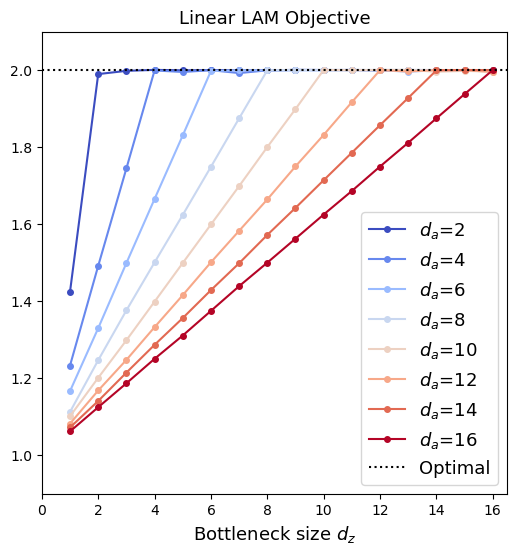

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


total_record = pd.read_csv('scripts/4_1_False.csv', index_col=0)

plt.figure(figsize=(6, 6))


cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=len(total_record.groupby('da')) - 1) 

counter = 0
for da_value, group in total_record.groupby('da'):
    # 按dz排序确保连线正确
    sorted_group = group.sort_values('dz')
    plt.plot(sorted_group['dz'], - sorted_group['act_mse'] + sorted_group['obs_mse'] + 1, label=f'$d_a$={da_value}', marker='o', markersize=4, color=cmap(norm(counter)))
    counter += 1

plt.plot([0, 17], [2, 2], 'k:', label='Optimal')

plt.xlim([0, 16.5])
plt.ylim([0.9, 2.1])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Bottleneck size $d_z$', fontsize=13)
plt.legend(fontsize=13)

# 学习 A 但是使用 $\hat{O}-O$ 来作为 latent 去预测 action

其实对于 action 的预测来说，是一样的：只要 dz 维度大于等于 da，就是完美预测了。但是对于 obs 的预测还是从 latent 出发的，只要 dz 维度比 da 大，里面就能存下更多 obs 的信息，这是我们不想要的。

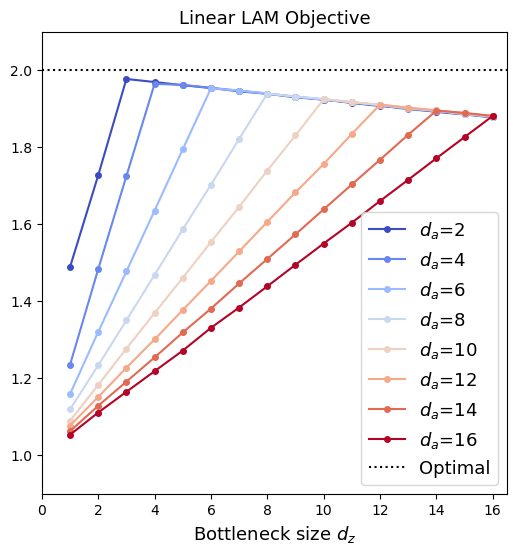

In [3]:
import matplotlib.pyplot as plt
import pandas as pd


total_record = pd.read_csv('scripts/4_1_learnATrue_CDzeroFalse_psdactionTrue.csv', index_col=0)
total_record = total_record.loc[total_record['iter'] == 5000]

plt.figure(figsize=(6, 6))


cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=len(total_record.groupby('da')) - 1) 

counter = 0
for da_value, group in total_record.groupby('da'):
    # 按dz排序确保连线正确
    sorted_group = group.sort_values('dz')
    plt.plot(sorted_group['dz'], - sorted_group['act_mse'] + sorted_group['obs_mse'] + 1, label=f'$d_a$={da_value}', marker='o', markersize=4, color=cmap(norm(counter)))
    counter += 1

plt.plot([0, 17], [2, 2], 'k:', label='Optimal')

plt.xlim([0, 16.5])
plt.ylim([0.9, 2.1])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Bottleneck size $d_z$', fontsize=13)
plt.legend(fontsize=13)

# 学习 A，但是各种预测从 $\hat{O}-O$ 作为 pseudo-latent 出发代替原本的 latent 做预测

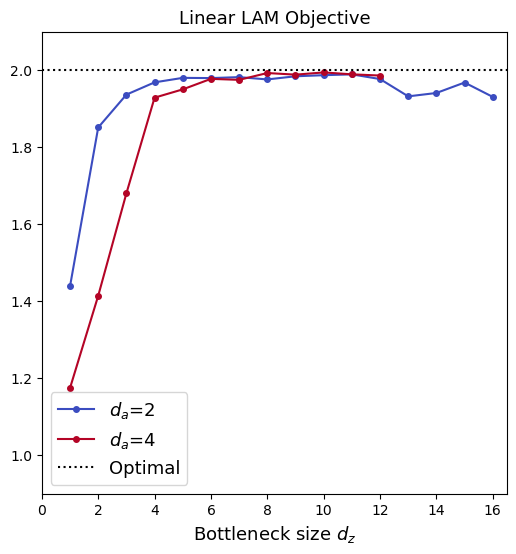

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


total_record = pd.read_csv('scripts/4_1_learnATrue_CDzeroFalse_psdlatentTrue.csv', index_col=0)
total_record = total_record.loc[total_record['iter'] == 20000]

plt.figure(figsize=(6, 6))


cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=len(total_record.groupby('da')) - 1) 

counter = 0
for da_value, group in total_record.groupby('da'):
    # 按dz排序确保连线正确
    sorted_group = group.sort_values('dz')
    plt.plot(sorted_group['dz'], - sorted_group['act_mse'] + sorted_group['obs_mse'] + 1, label=f'$d_a$={da_value}', marker='o', markersize=4, color=cmap(norm(counter)))
    counter += 1

plt.plot([0, 17], [2, 2], 'k:', label='Optimal')

plt.xlim([0, 16.5])
plt.ylim([0.9, 2.1])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Bottleneck size $d_z$', fontsize=13)
plt.legend(fontsize=13)